<a href="https://colab.research.google.com/github/BoHye0202/Toy-Project/blob/main/5.Music%20Recommendation%20based%20on%20emotion/Facial_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Kaggle 데이터
https://www.kaggle.com/ananthu017/emotion-detection-fer

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"choibohye","key":"b82e31a50310da16da34248c963dfa0b"}'}

In [2]:
ls -1ha kaggle.json

kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        172           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        304           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        911            True  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       5638           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      45589            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      11835            True  
connectx

In [4]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

 95% 62.0M/65.2M [00:00<00:00, 124MB/s]
100% 65.2M/65.2M [00:00<00:00, 186MB/s]


In [5]:
!ls

emotion-detection-fer.zip  kaggle.json	sample_data


In [6]:
!unzip emotion-detection-fer.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    
  inflating: t

# 2. 데이터 불러오기

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import random

import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image

In [8]:
path = '/content/train/'

os.listdir(path)

['neutral', 'fearful', 'angry', 'happy', 'surprised', 'disgusted', 'sad']

## 이미지 출력

In [9]:
def plot_image(label):
  fig, ax = plt.subplots(1, 5, figsize=(25,12))
  fig.subplots_adjust(hspace=.2, wspace=.2)
  ax = ax.ravel()
  url = path+label

  for i in range(5):
    file = random.choice(os.listdir(url))
    f = img.imread(url+'/'+file)
    ax[i].imshow(f, cmap='gray')
    ax[i].set_title(label)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

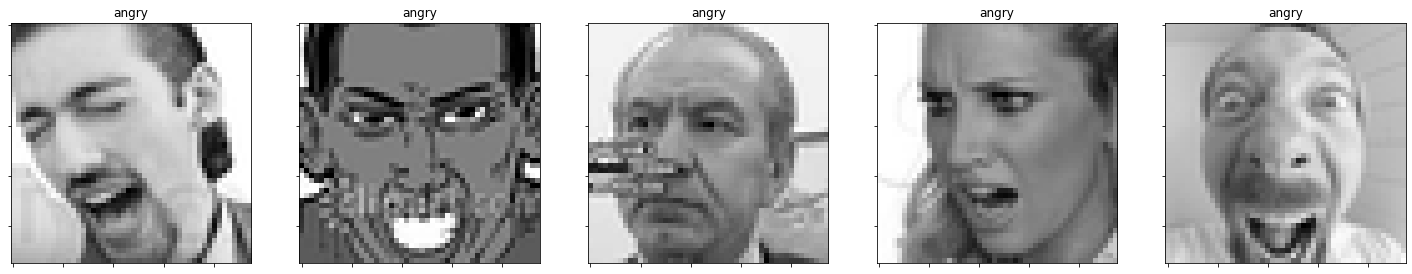

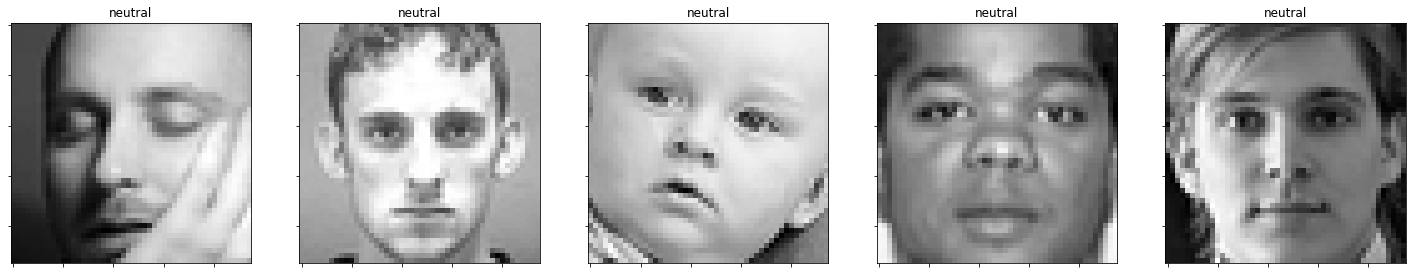

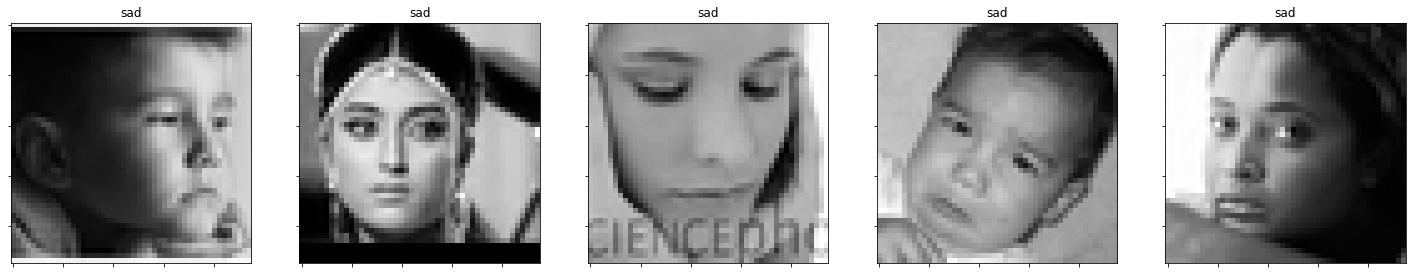

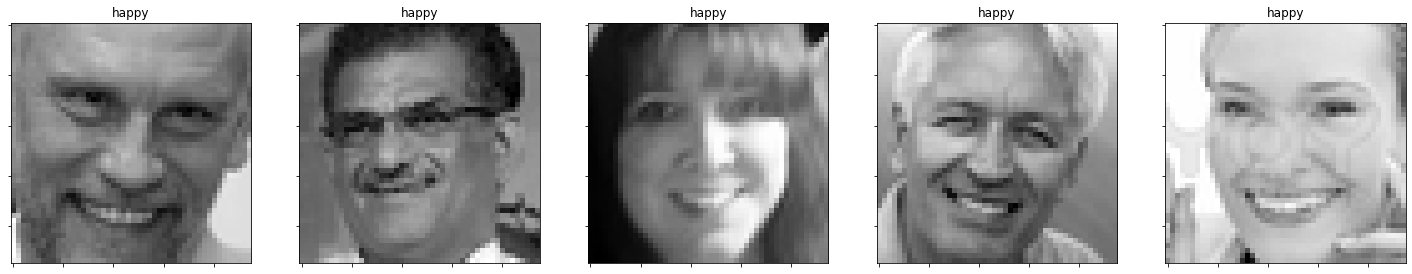

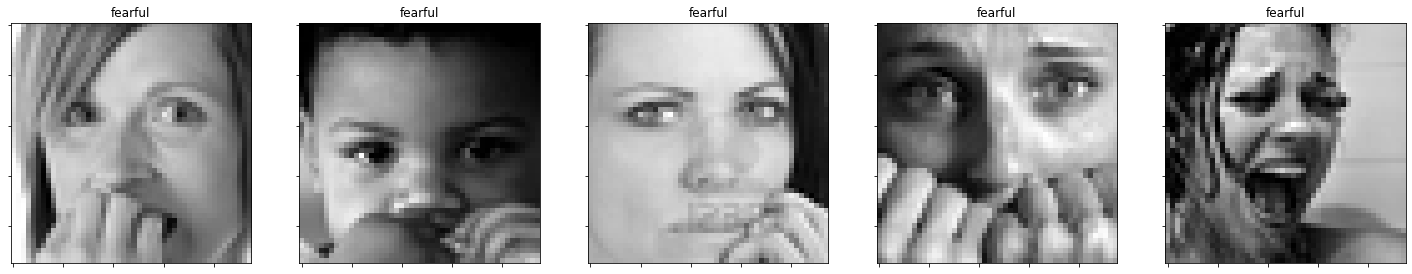

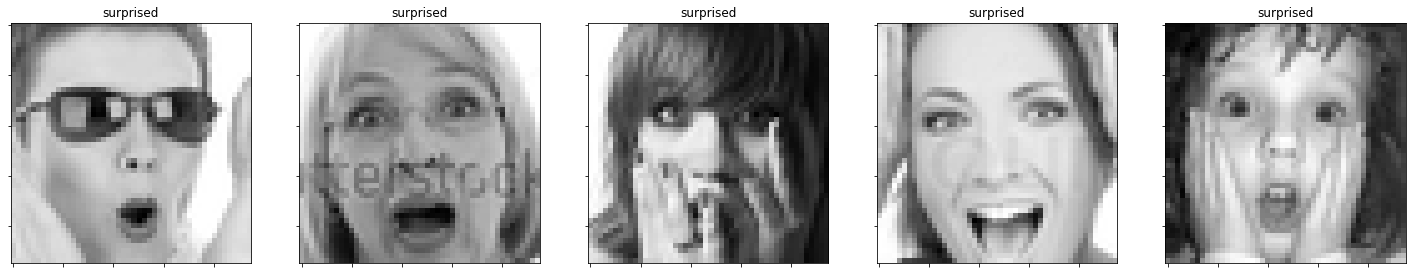

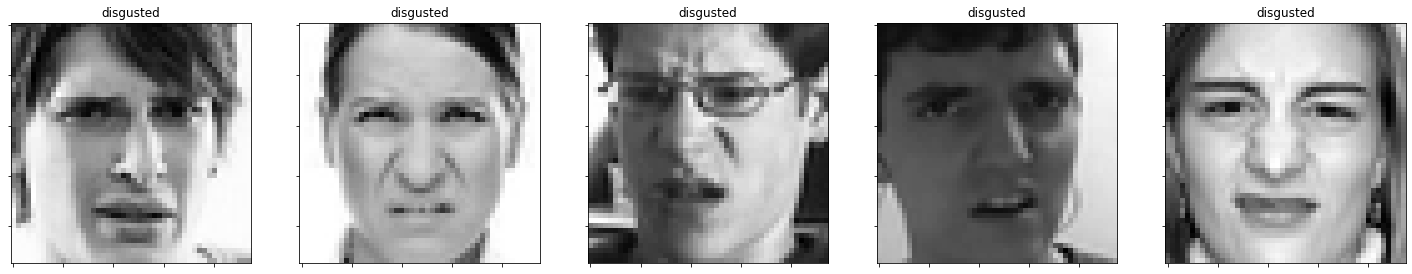

In [10]:
plot_image('angry')
plot_image('neutral')
plot_image('sad')
plot_image('happy')
plot_image('fearful')
plot_image('surprised')
plot_image('disgusted')

In [11]:
classes = ['neutral', 'sad', 'angry', 'happy', 'fearful', 'surprised', 'disgusted']

In [12]:
def plot_all_image():
  fig, ax = plt.subplots(1, 7, figsize=(30,12))
  fig.subplots_adjust(hspace = .2, wspace=.2)
  ax = ax.ravel()
  
  for i in range(len(classes)):
    url = path+classes[i]
    file = random.choice(os.listdir(url))
    f = img.imread(url+'/'+file)
    
    ax[i].imshow(f, cmap='gray')
    ax[i].set_title(classes[i])
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

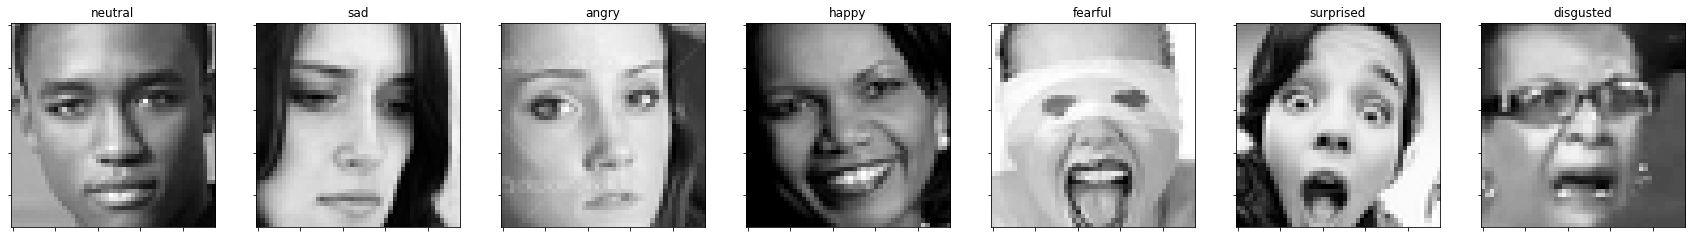

In [13]:
plot_all_image()

## 이미지 전처리 및 array변환

In [14]:
def label(name):
  l = {'neutral':0, 
       'sad':1,
       'angry':2, 
       'happy':3, 
       'fearful':4, 
       'surprised':5,
       'disgusted':6}
  return l[name]

def name(label):
  l = {0:'neutral', 
       1:'sad',
       2:'angry', 
       3:'happy', 
       4:'fearful',
       5:'surprised',
       6:'disgusted'}
  return l[label]

In [15]:
X = []
y = []

img_size = 48
for i in classes:
  url = path+i
  k = len(os.listdir(url))
  y.append([label(i) for _ in range(k)])

  print('Number of y data: ', i, k)

  for img in os.listdir(url):
    img = url+'/'+img
    image = Image.open(img)
    data = np.asarray(image)
    data = data/255.0 # Normalization

    X.append(data)

y = sum(y, [])
print('\nNumber of Training Images and Shape: ', np.shape(X))
print('Number of Training label: ', len(y))

Number of y data:  neutral 4965
Number of y data:  sad 4830
Number of y data:  angry 3995
Number of y data:  happy 7215
Number of y data:  fearful 4097
Number of y data:  surprised 3171
Number of y data:  disgusted 436

Number of Training Images and Shape:  (28709, 48, 48)
Number of Training label:  28709


# 3. Data Split

In [16]:
from sklearn.model_selection import  train_test_split
from keras.utils.np_utils import to_categorical

X = np.array(X)
y = np.array(y)
X = X.reshape(-1, img_size, img_size, 1)

y= to_categorical(y,num_classes=7)

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=42)
X_train,X_val, y_train,y_val= train_test_split(X_train, y_train, test_size=0.2,random_state=42)

print('Train Data Shape: ', X_train.shape, y_train.shape)
print('Validation Data Shape: ', X_val.shape, y_val.shape)
print('Test Data Shape: ', X_test.shape, y_test.shape)

Train Data Shape:  (16076, 48, 48, 1) (16076, 7)
Validation Data Shape:  (4020, 48, 48, 1) (4020, 7)
Test Data Shape:  (8613, 48, 48, 1) (8613, 7)


# 4. Build Model

In [17]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras import regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [19]:
# Vgg16모델의 filter는 64-128-256-512-512-4096(dense) 크기였으나 수정하여 진행

epochs=600
batch_size=64

# model= tf.keras.models.Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
# model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
    
# model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten()) 
# model.add(Dense(256,activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))
    
# model.add(Dense(512,activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Dense(7, activation='softmax'))

# Vgg16 변형
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(img_size,img_size, 1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(7,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)       

In [20]:
#defining optimizer
optimizer=Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)

#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=True,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(X_train)

checkpoint_path = "result/cp-{epoch:03d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1, period=20)

#model fitting
history=model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                            epochs=epochs,
                            validation_data=(X_val,y_val),
                            steps_per_epoch=X_train.shape[0]//batch_size,
                            callbacks = [cp_callback]
                           )

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


251/251 [==============================] - 41s 40ms/step - loss: 1.9249 - accuracy: 0.2117 - val_loss: 1.8224 - val_accuracy: 0.2582
Epoch 2/500
251/251 [==============================] - 9s 37ms/step - loss: 1.8292 - accuracy: 0.2275 - val_loss: 1.8414 - val_accuracy: 0.2582
Epoch 3/500
251/251 [==============================] - 9s 37ms/step - loss: 1.8200 - accuracy: 0.2359 - val_loss: 1.8297 - val_accuracy: 0.2602
Epoch 4/500
251/251 [==============================] - 9s 37ms/step - loss: 1.8092 - accuracy: 0.2406 - val_loss: 1.8222 - val_accuracy: 0.2557
Epoch 5/500
251/251 [==============================] - 9s 37ms/step - loss: 1.8092 - accuracy: 0.2398 - val_loss: 1.8137 - val_accuracy: 0.2582
Epoch 6/500
251/251 [==============================] - 9s 37ms/step - loss: 1.8068 - accuracy: 0.2434 - val_loss: 1.8280 - val_accuracy: 0.2597
Epoch 7/500
251/251 [==============================] - 9s 37ms/step - loss: 1.8028 - accuracy: 0.2450 - val_loss: 1.7854 - val_accuracy: 0.2597
Epo

In [22]:
from tensorflow.python.keras.models import load_model
model.save('third_model.h5')

In [23]:
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# plot_model(model, to_file='model.png',show_shapes=True)

AssertionError: ignored

# 5. Result

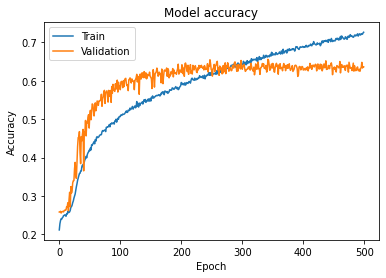

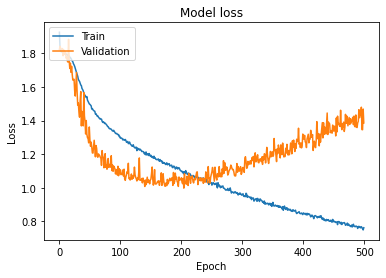

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()